t-SNE Dimension: 2, Clusters: 4, Noise Points: 13


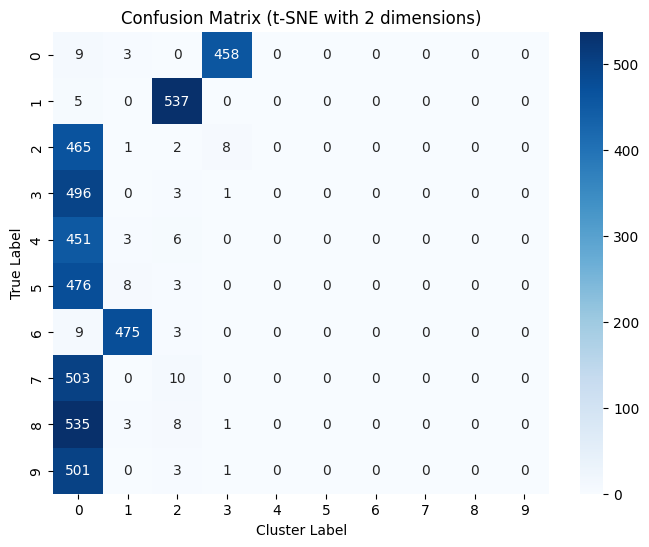

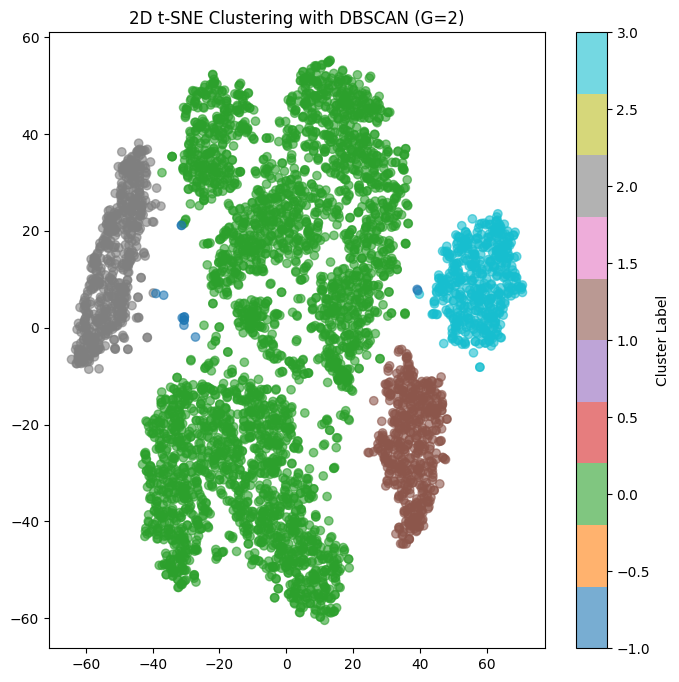

t-SNE Dimension: 3, Clusters: 1, Noise Points: 1


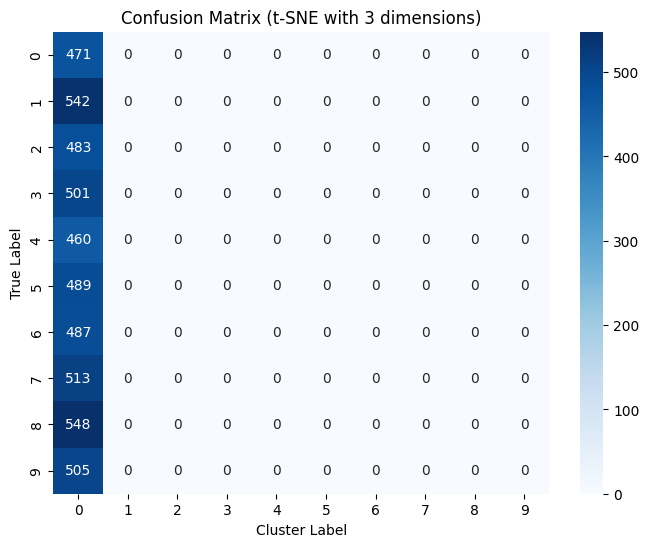

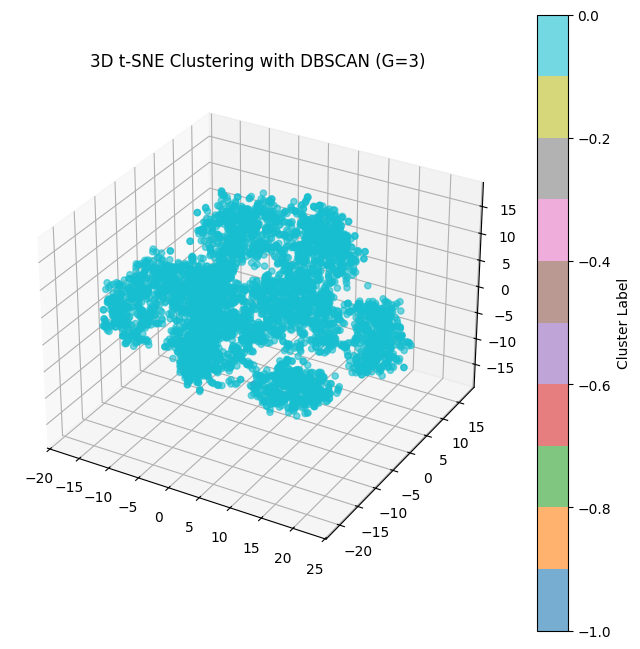

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
import seaborn as sns

mnist = fetch_openml('mnist_784')
X, y = np.array(mnist.data), np.array(mnist.target).astype(int)

sample_size = 5000
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]
y_sample = y[indices]

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_sample)

dimensions = [2, 3]
for g in dimensions:
    tsne = TSNE(n_components=g, perplexity=40, random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    dbscan = DBSCAN(eps=5, min_samples=10)
    labels = dbscan.fit_predict(X_tsne)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"t-SNE Dimension: {g}, Clusters: {n_clusters}, Noise Points: {n_noise}")

    cm = confusion_matrix(y_sample, labels, labels=range(10))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (t-SNE with {g} dimensions)')
    plt.xlabel('Cluster Label')
    plt.ylabel('True Label')
    plt.show()

    if g == 2:
        plt.figure(figsize=(8, 8))
        scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', alpha=0.6)
        plt.title(f'2D t-SNE Clustering with DBSCAN (G={g})')
        plt.colorbar(scatter, label='Cluster Label')
        plt.show()
    elif g == 3:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels, cmap='tab10', alpha=0.6)
        ax.set_title(f'3D t-SNE Clustering with DBSCAN (G={g})')
        plt.colorbar(scatter, label='Cluster Label')
        plt.show()
